# Partial Derivatives
Until now, we've considered derivatives of functions that operate on a single variable. How do we take the derivatives of a function like the following?

$$f(x,y) = x^2 + y^2$$

We can take a derivative of the changes in the function with respect to either x or y. We call these derivatives with respect to one variable partial derivatives. Let's give this a try by taking the derivative of $f(x,y)$ with respect to ***x***. We write this partial derivative as follows.

$$\frac{\partial f(x,y)}{\partial x} = \frac{\partial (x^2 + y^2)}{\partial x}$$

Just as ordinary derivatives give us a way to compute the rate of change of a function, partial derivatives give us a way to compute the rate of change of a function of many variables with respect to one of those variables.

Since $f(x,y)$ is the sum of several simpler functions we need to take the partial derivative of each of these and sum the result. The first two parts are easy.

$$\frac{\partial x^2}{\partial x} = 2x$$

Notice that we are following the usual rules of differentiation for any function of ***x*** here. 

Now we need to take the partial derivative of the last part of $f(x,y)$, which does not depend on ***x*** at all. In these care we get the following.

$$\frac{\partial y^2}{\partial x} = 0$$

Now we can add up the parts to get the complete partail derivative of $f(x,y)$.

$$\frac{\partial f(x,y)}{\partial x} = 2x + 0 = 2x$$

We can also take the partial derivative of $f(x,y)$ with respect to ***y***. The process proceeds in the following manner.

$$\frac{\partial f(x,y)}{\partial y} = 0 + 2y = 2y$$

## Computing a Gradient

At this point, you may well ask what is the point of computing partial derivatives? Yes, they are a nifty math trick, but what are they good for? It turns out that partial derivatives are important if you want to find the analog of the slope for multi-dimensonal surfaces. We call this quantity the **gradient**. 

Recall that you can find minimum and maximum of curves using derivatives. In the same way, you can find the minimum and maximum of surfaces by following the gradiennt and finding the points were the gradient is zero in all directions. 

You have already examined the partial derivatives of the function, $f(x,y) = x^2 + y^2$. These partial derivatives are:

$$\frac{\partial f(x,y)}{\partial x} = 2x \\
\frac{\partial f(x,y)}{\partial y} = 2y$$

In this case, the gradient is a 2-dimensional vector of the change of the function in the $x$ direction and the change in the function in the $y$ direction. This vector can be written as follows:

$$grad(f(x,y)) =  \vec{g(x,y)} = \begin{bmatrix}\frac{\partial f(x,y)}{\partial x} \\ \frac{\partial f(x,y)}{\partial y} \end{bmatrix} = \begin{bmatrix}2x \\ 2y \end{bmatrix} $$

## Plotting the Gradient

A plot will help you get feel for the meaning of the gradient. The code below plots the gradient of the function $f(x,y) = x^2 + y^2$ along with contours of the value of the function. Run this code and examine the plot.  

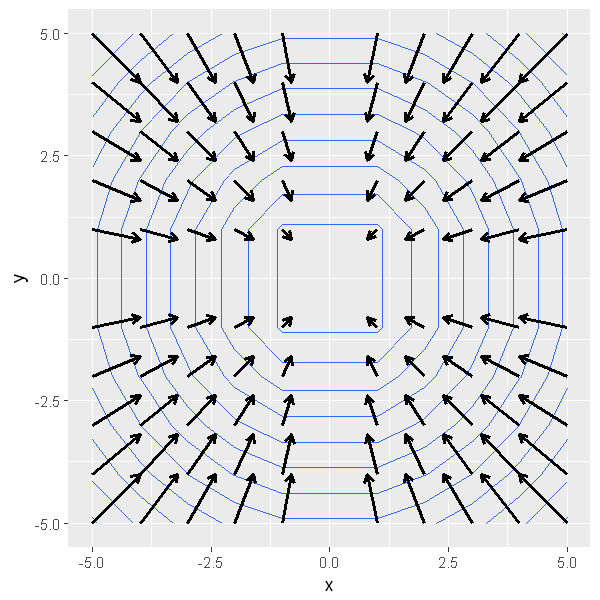

In [1]:
library(ggplot2)
library(repr)
options(repr.plot.width=5, repr.plot.height=5) # Set the initial plot area dimensions

## Create data frame from grid with out {0,0}
df = data.frame(expand.grid(x=c(seq(-5,-1), seq(1,5)), y=c(seq(-5,-1), seq(1,5))))
df$dx = 2 * df$x
df$dy = 2 * df$y
df$mag = sqrt(df$x^2 + df$y^2)
df$dx_scale = 0.1 * df$dx # scale to get desired line length
df$dy_scale = 0.1 * df$dy # scale to get desired line length

#df

ggplot(df) + 
  geom_contour(aes(x, y, z = mag)) +
  geom_segment(aes(x = x, y = y, xend = x - dx_scale, yend = y - dy_scale),
    size = 1, arrow = arrow(length = unit(0.2,"cm")))

Notice the following properties of this plot. 
- The arrows in the plot point in the direction of the gradient.
- The width of the arrows is proportional to the value of the gradient. The width of the arrows and the **gradient decreases as function gets closer to the minimum**. If this is the case everywhere, you can say that a function is **convex**. It is always much easier to find minimum of convex functions.  
- The **direction of the gradient is always perpendicular to the contours**. This is an important property of multivariate functions. 

## Using the gradient

So, what is all this good for? Say that you want to find the minimum of the function $f(x,y) = x^2 + y^2$. It is easy to see that the minimum of this function is at $x = 0$ and $y = 0$. But, what if you did not know this solution? Then you could do the following:

1. Take some starting guess.
2. Compute the  gradient.
3. take a small step in the direction of the gradient.
4. Determine if the gradient is close to zero. If so, then stop, since the gradient will be zero at the minimum.
5. Repeate steps 2, 3 and 4. 

The algorithm outlined above is called the **gradient decent method**. It is the basis of many real-world minimization algorithms. 